In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [3]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [4]:
#data.info()

In [5]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [8]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [9]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [10]:
data = pd.read_csv('./data/df_2018_formatted_with_zip.csv')

In [11]:
data.shape

(747323, 24)

In [12]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
0,0.0,37115.0,PD201800168337,2018-02-15 07:30:00,20180150305,A,70,Burglary - Residence,A,ALARM,12,LOCATION/BUILDING SECURE,1000.0,FALLS AV,711A,M,11,1521.0,36.246,-86.705,"(36.246, -86.705)",2,15,POINT (-86.705 36.246)
1,0.0,37115.0,PD201800344402,2018-04-04 17:31:00,20180303397,B,43,Want Officer for Investigation / Assistance,P,PROGRESS,5,GONE ON ARRIVAL,500.0,CHEYENNE BLVD,5121,M,13,1617.0,36.260,-86.679,"(36.26, -86.679)",4,4,POINT (-86.679 36.26)
2,0.0,37115.0,PD201800344119,2018-04-04 16:25:00,20180303160,B,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,RANDY RD & NEELYS BEND RD,7F75,M,13,1631.0,36.252,-86.694,"(36.252, -86.694)",4,4,POINT (-86.694 36.252)
3,0.0,37115.0,PD201800380651,2018-04-14 11:56:00,20180335090,A,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,800.0,GALLATIN PKE S,711A,M,11,1623.0,36.253,-86.716,"(36.253, -86.716)",4,14,POINT (-86.71600000000002 36.253)
4,0.0,37115.0,PD201800198240,2018-02-23 08:31:00,20180176276,A,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,PIERCE RD & ANDERSON LN,713A,M,15,1729.0,36.273,-86.703,"(36.273, -86.703)",2,23,POINT (-86.70299999999997 36.273)


In [13]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
747318,NaN,NaN,PD201800915144,2018-09-16 13:31:33,20180791574,A,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,1,M.P.D. REPORT COMPLED,NaN,MURFREESBORO PKE,535B,NaN,NaN,NaN,NaN,NaN,NaN,9,16,POINT (nan nan)
747319,NaN,NaN,PD201800915648,2018-09-16 17:53:09,20180791868,B,50,Theft,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,ABBOTT MARTIN RD,117B,NaN,NaN,NaN,NaN,NaN,NaN,9,16,POINT (nan nan)
747320,NaN,NaN,PD201800915346,2018-09-16 15:31:53,20180791637,B,50,Theft,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,OPRY MILLS DR,511B,NaN,NaN,NaN,NaN,NaN,NaN,9,16,POINT (nan nan)
747321,NaN,NaN,PD201800915117,2018-09-16 13:18:33,20180791997,A,50,Theft,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,TEMPLETON DR,125B,NaN,NaN,NaN,NaN,NaN,NaN,9,16,POINT (nan nan)
747322,NaN,NaN,PD201800915687,2018-09-16 18:10:54,20180791887,B,50,Theft,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,ALMADALE CT,833B,NaN,NaN,NaN,NaN,NaN,NaN,9,16,POINT (nan nan)


In [14]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [15]:
#data['tc_desc'].value_counts()

In [16]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

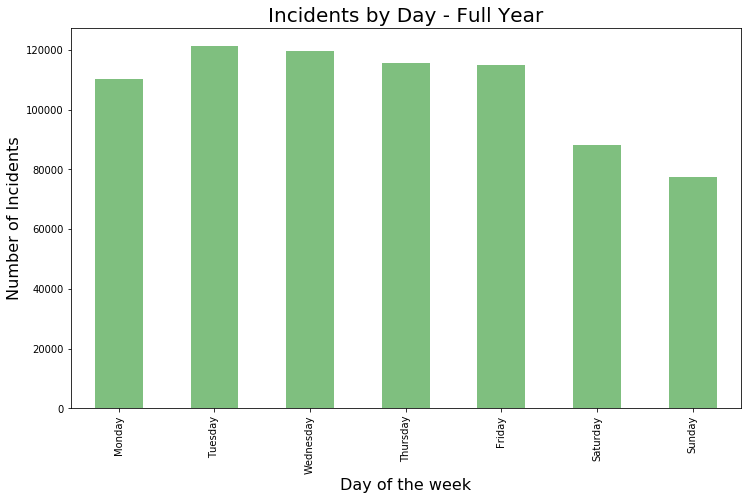

In [17]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

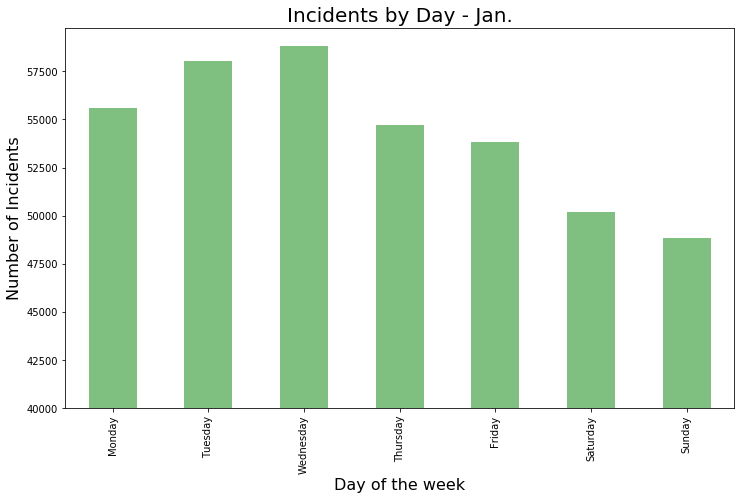

In [18]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

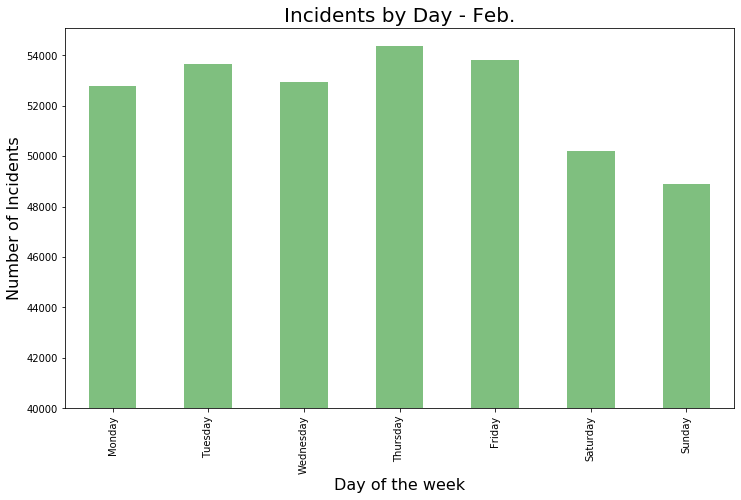

In [19]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

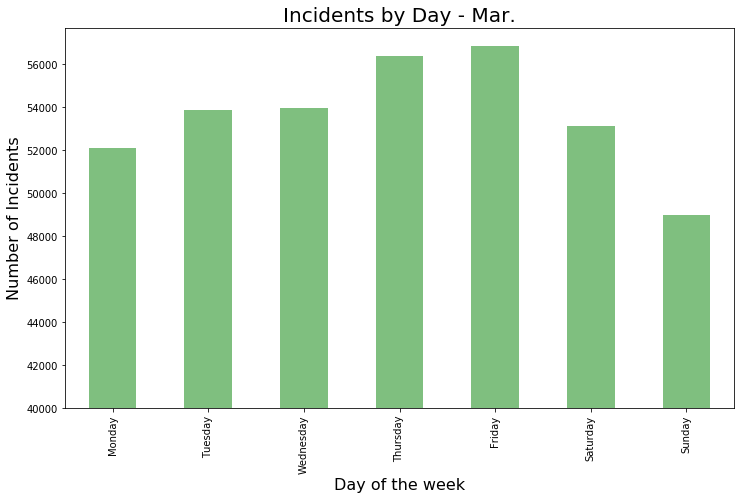

In [20]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

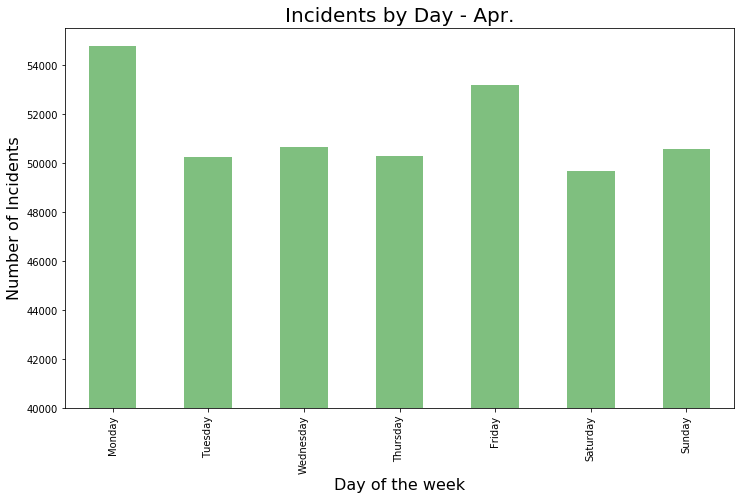

In [21]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

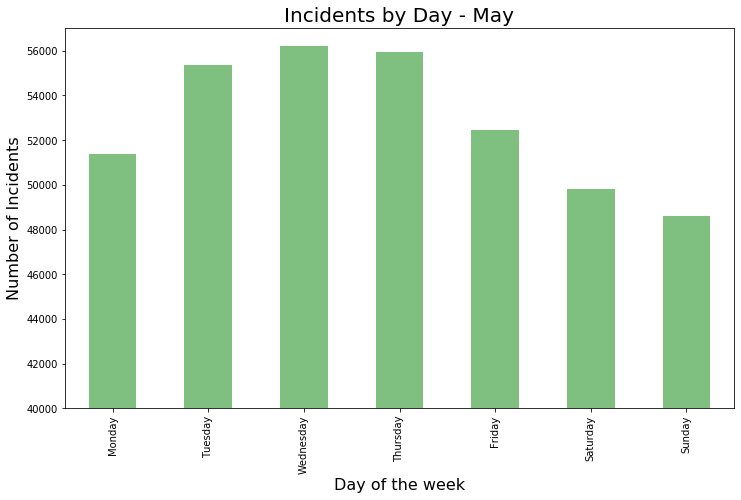

In [22]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

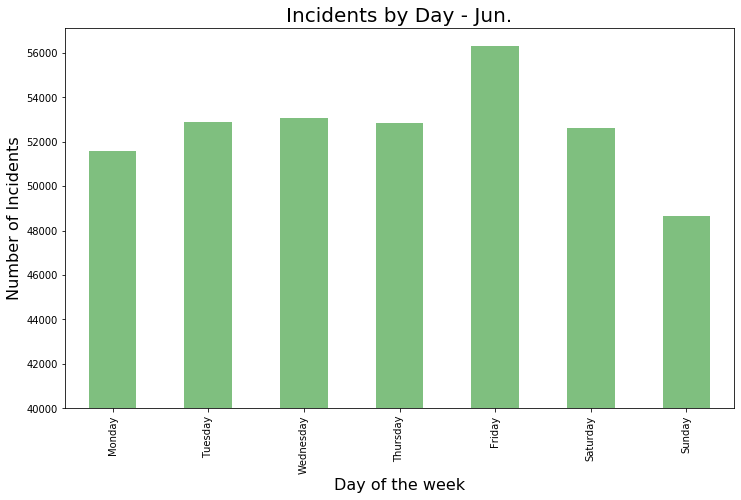

In [23]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

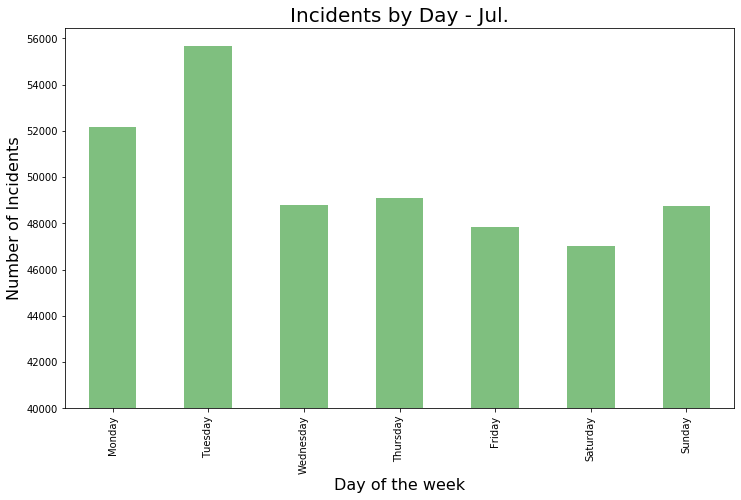

In [24]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

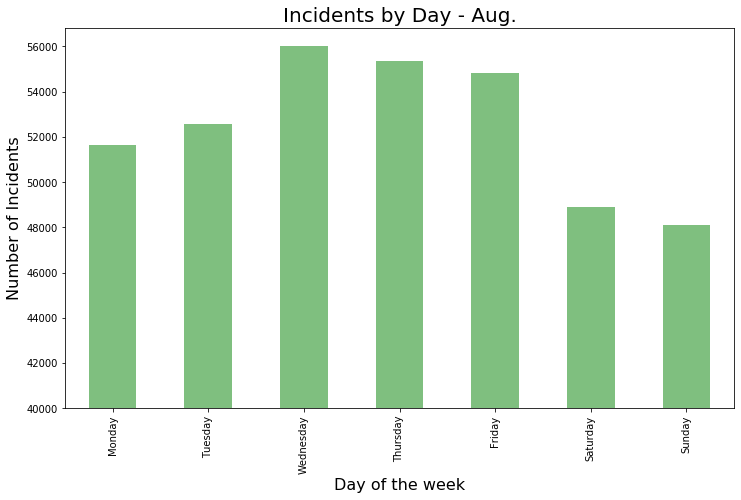

In [25]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

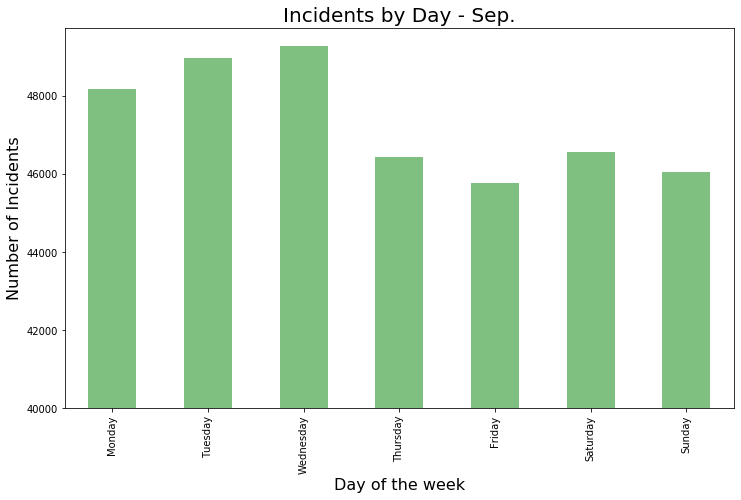

In [26]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

2018 File does not contain months: Oct, Nov, or Dec.

In [28]:
#octo = data[data.month == 10]

# Number of incidents per day of the week
#day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
#day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
#Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
#plt.title('Incidents by Day - Oct.', fontsize=20)
#plt.xlabel('Day of the week',fontsize=16)
#plt.ylabel('Number of Incidents',fontsize=16)

In [30]:
#nov = data[data.month == 11]

# Number of incidents per day of the week
#day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
#day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
#Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
#plt.title('Incidents by Day - Nov.', fontsize=20)
#plt.xlabel('Day of the week',fontsize=16)
#plt.ylabel('Number of Incidents',fontsize=16)

In [31]:
#dec = data[data.month == 12]

# Number of incidents per day of the week
#day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
#day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
#Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
#plt.title('Incidents by Day - Dec.', fontsize=20)
#plt.xlabel('Day of the week',fontsize=16)
#plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [32]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
#q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
#qt4 = pd.concat(q4)

In [33]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
#q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct]

qtr = ['Q1','Q2','Q3']

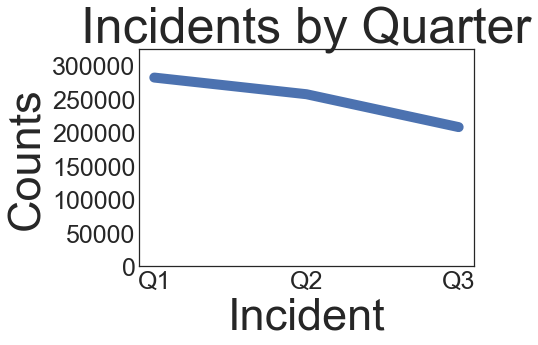

In [34]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [35]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     21720
2     21776
3     22553
4     22831
5     23660
6     21236
7     21930
8     21794
9     20742
10    22057
11    22174
12    21322
13    20246
14    21562
15    21918
16    21188
17     9792
18    20378
19    21124
20    20163
21    19963
22    19124
23    19799
24    20184
25    20505
26    21906
27    12221
28    18989
29    16107
30    16549
31    16510
32    19426
33    19537
34    19574
35    19807
36    18743
37    15839
38    12374
Name: call_re, dtype: int64


In [36]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [38]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,21720
2,2,21776
3,3,22553
4,4,22831
5,5,23660
6,6,21236
7,7,21930
8,8,21794
9,9,20742
10,10,22057


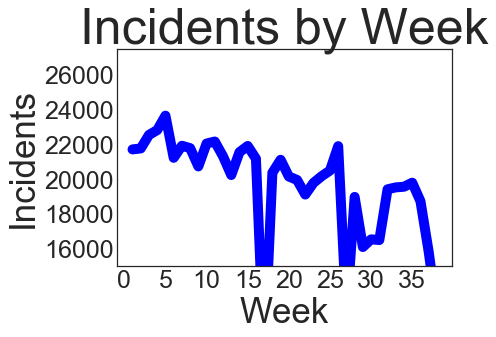

In [39]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

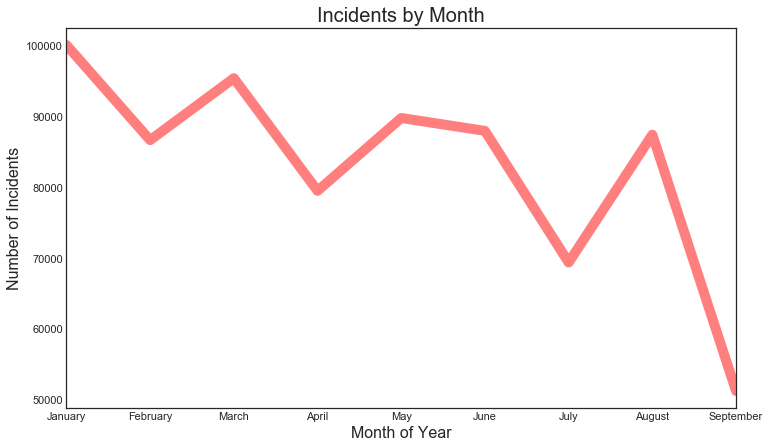

In [42]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,10)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [43]:
inc_ct = data.tc_desc.value_counts()

In [44]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [45]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

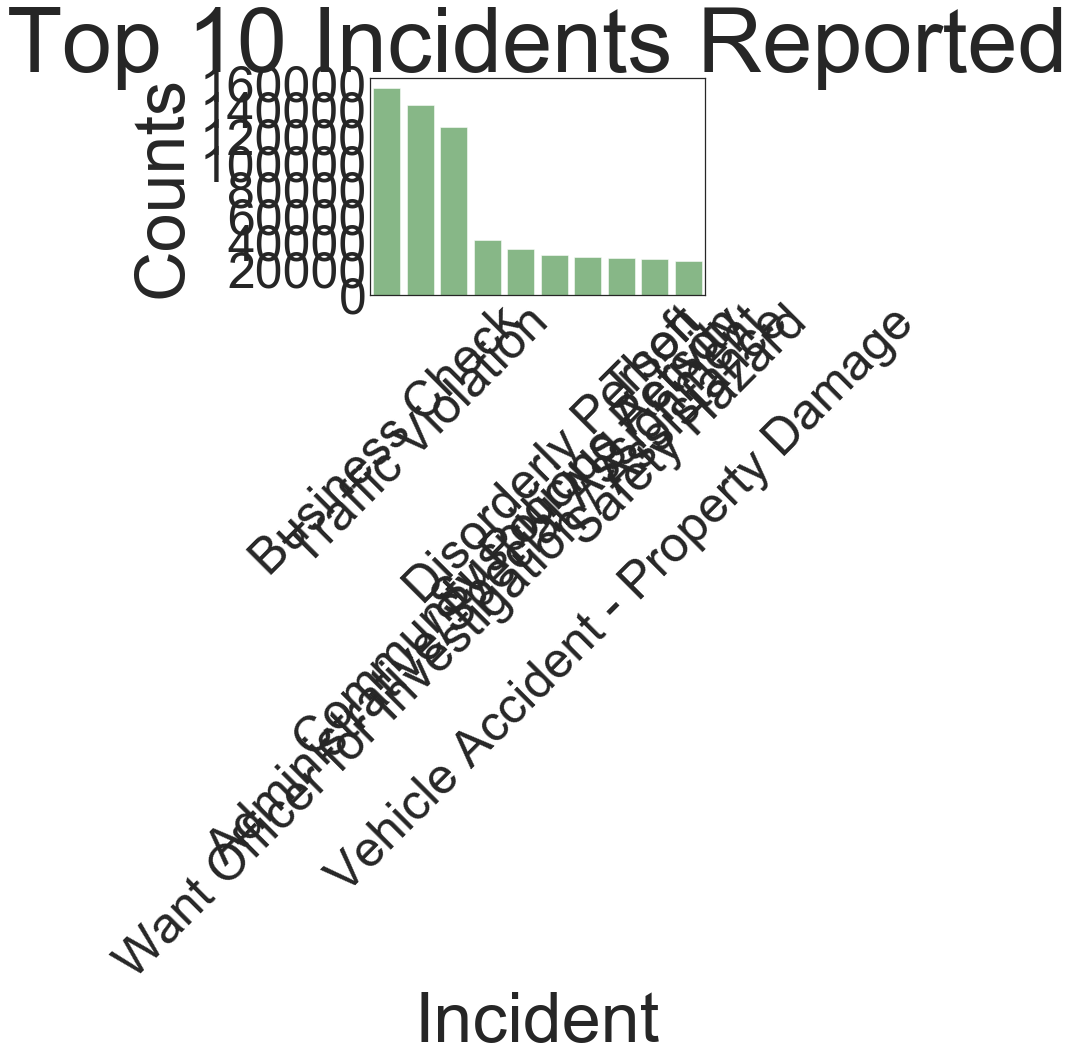

In [46]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [47]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

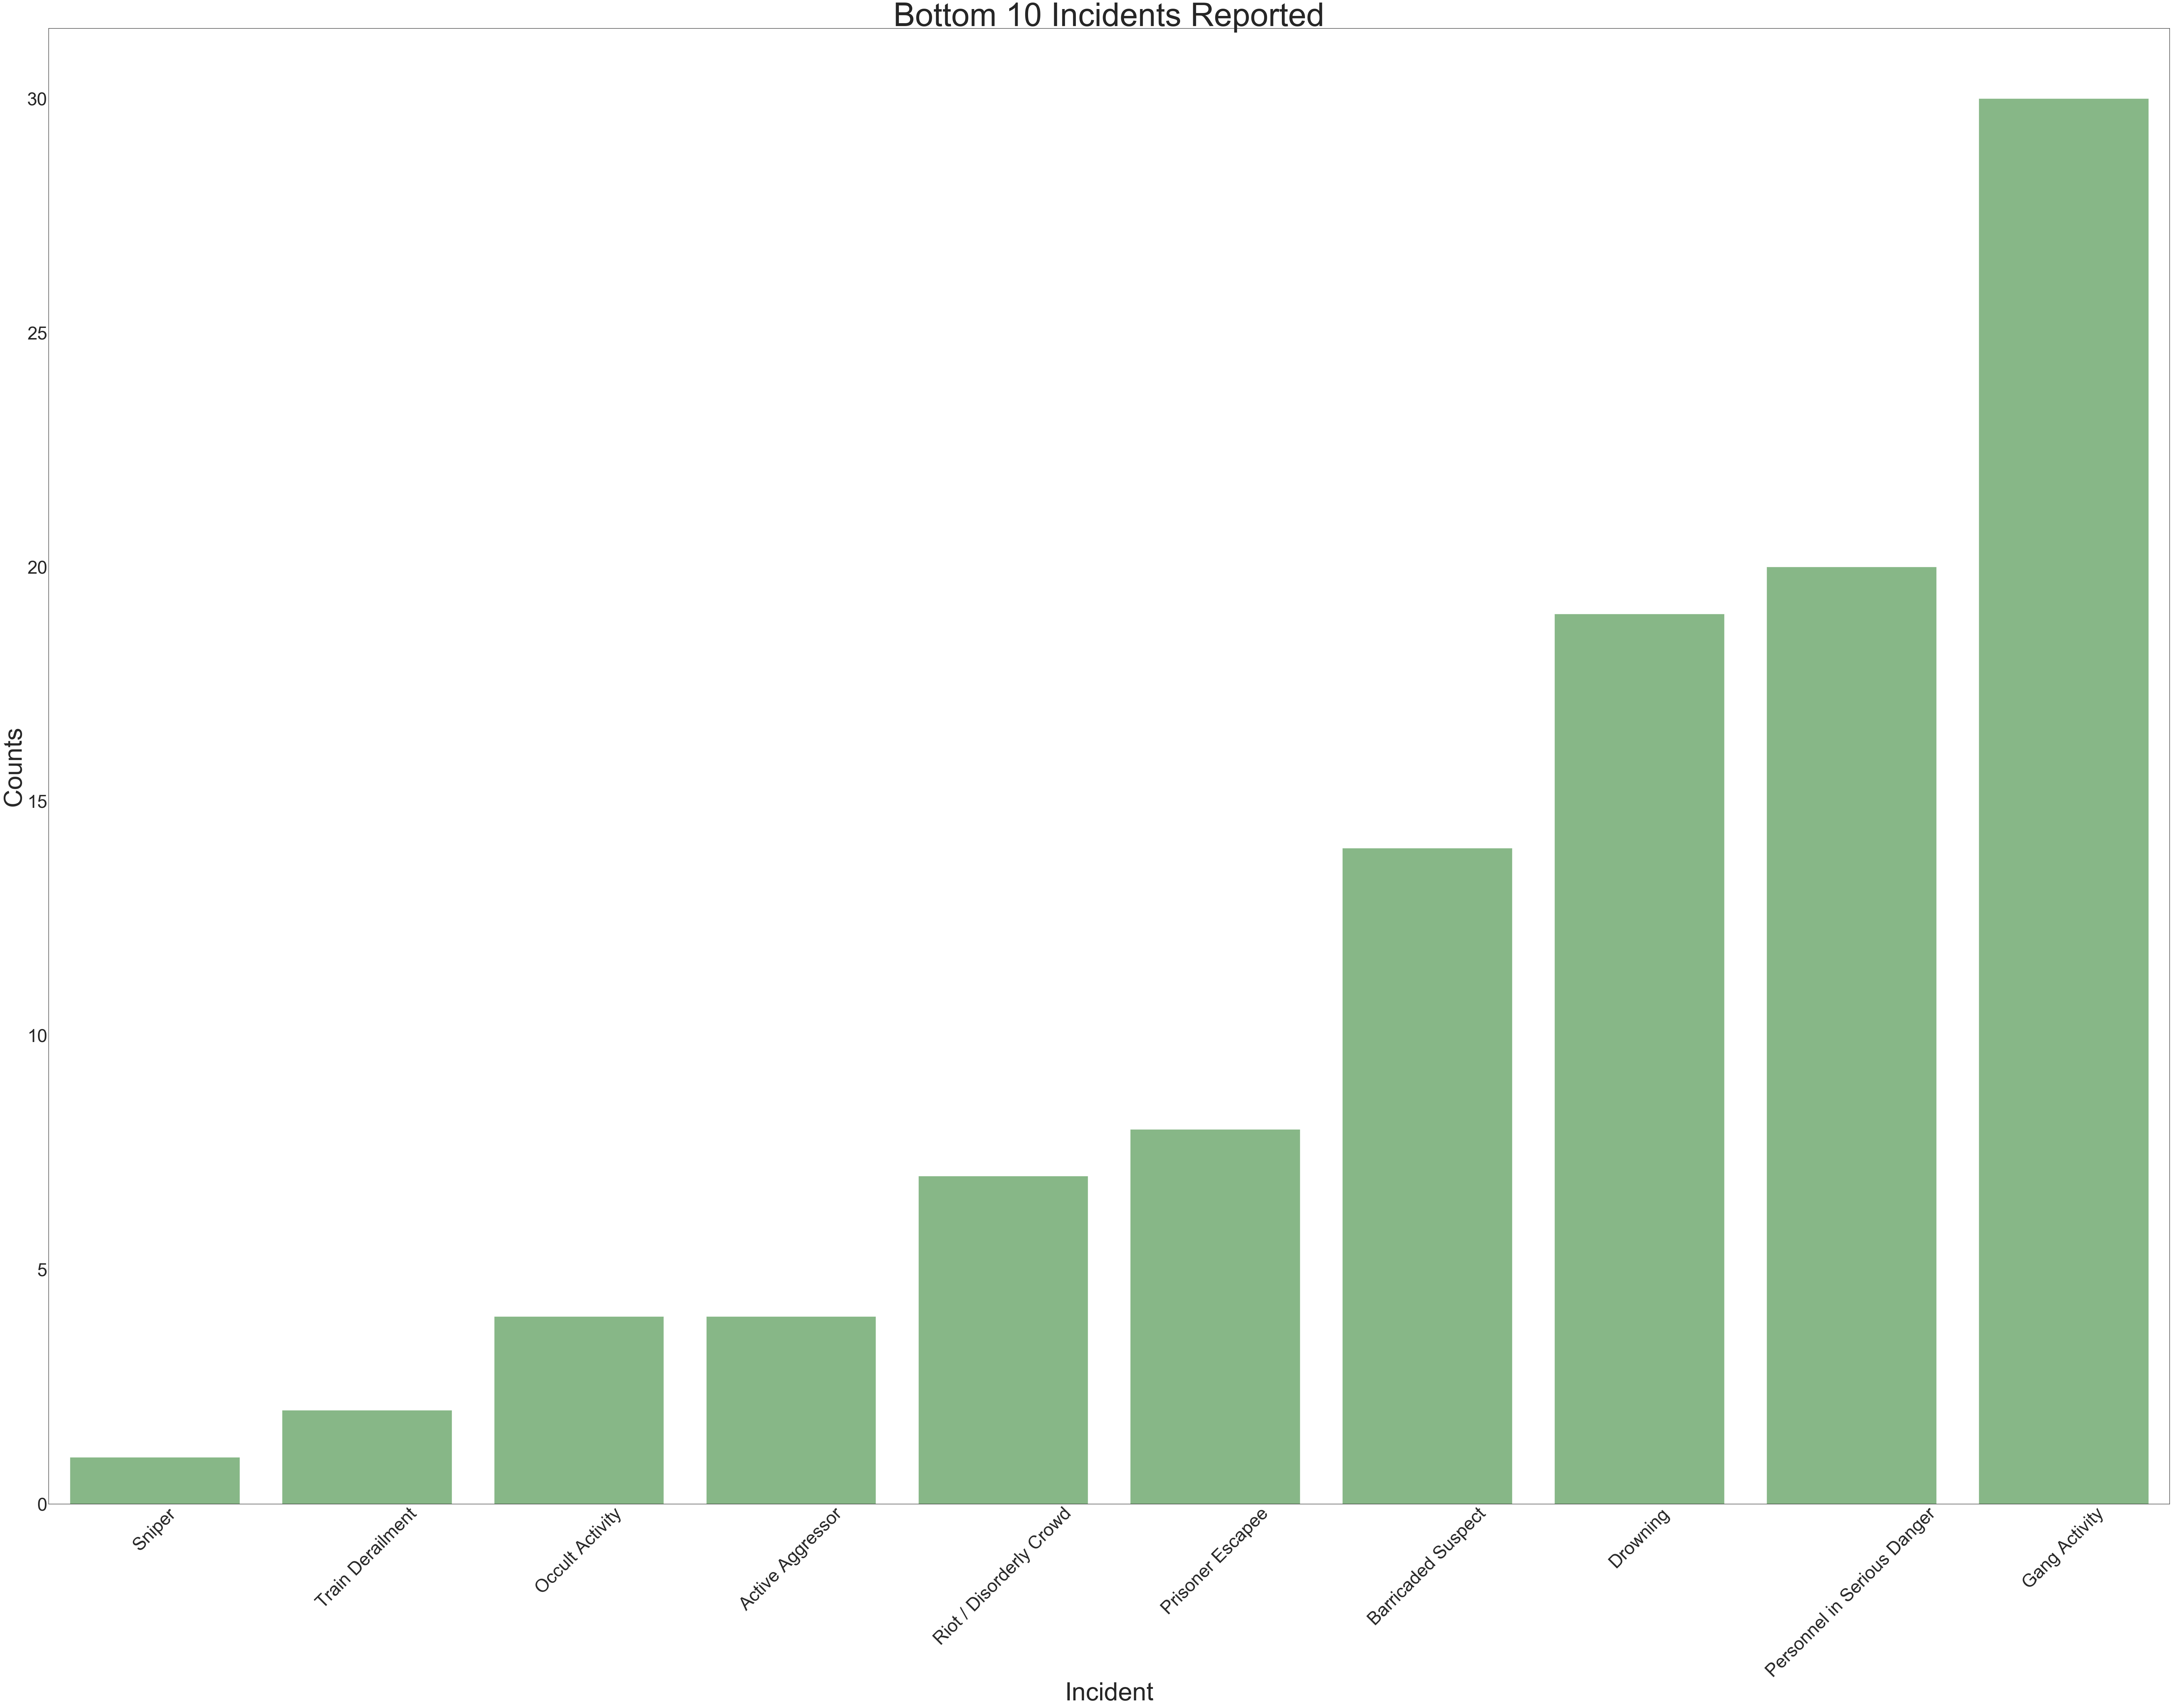

In [48]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [49]:
zip_ct = data.zip.value_counts()

In [50]:
zip_ct.shape

(39,)

In [51]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [ ]:
zip_cts.head()

In [52]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

18410.79487179487


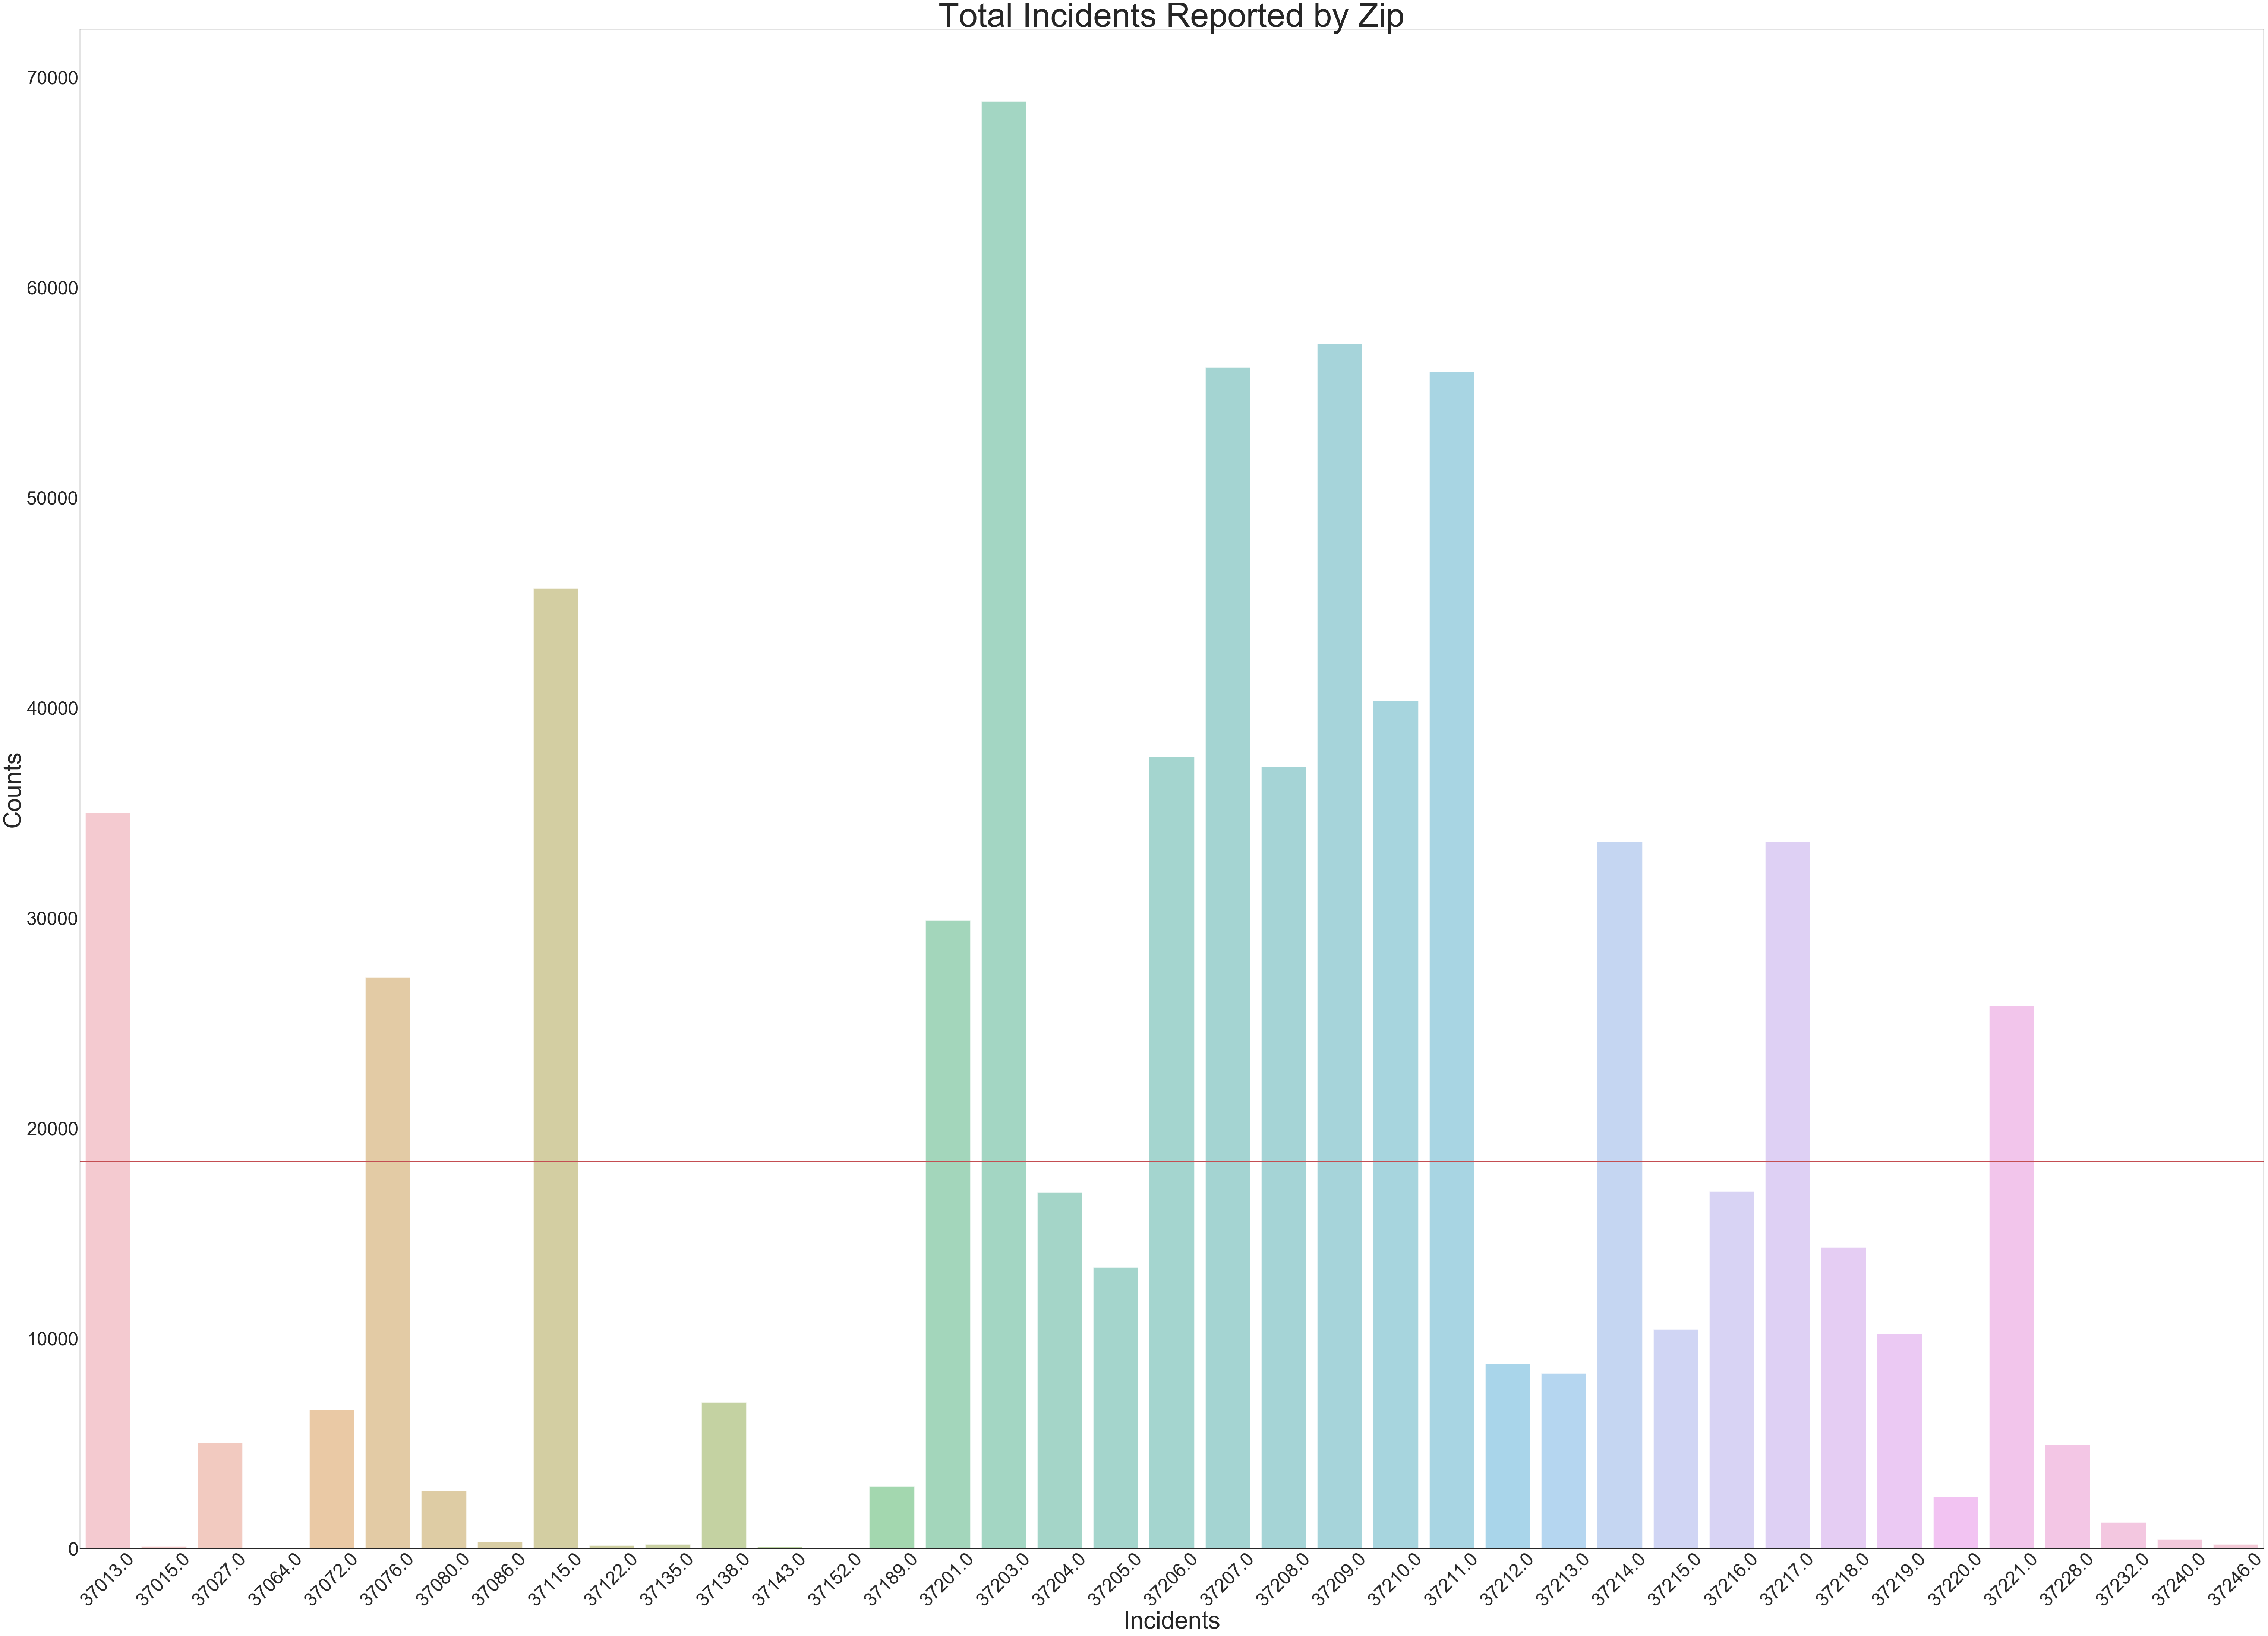

In [53]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [ ]:
#pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [ ]:
#pop_zips.head()

#### Merge zip_cts to pop_zips

In [ ]:
#zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [ ]:
# only focus on this year's info

#zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2015','y-2014','y-2013','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [ ]:
#zips_all.head()

#### Calculate crime rate by zipcode

In [ ]:
#zips_all['incident_rate'] = ((zips_all['count']/zips_all['y-2016'])*100000)

In [ ]:
#zips_all.head()

In [ ]:
#sns.set_style("white")
#plt.style.use('seaborn-white')


#g = sns.barplot(x = "zip",y = "incident_rate", data = zips_all, ci = None, alpha = 0.5)
#plt.xticks(rotation=45, fontsize = 50)
#plt.yticks(rotation=0, fontsize = 50)
#sns.set(rc={'figure.figsize':(90, 70)})
#plt.title("Incidnet Rate by Zip", fontsize = 90)
#plt.xlabel("Zip Code", fontsize = 65)
#plt.ylabel("Incident Rate", fontsize = 65)
#plt.show()